In [3]:
from datasets import load_dataset
wikipedia_ds = load_dataset("wikipedia", language="he", date="20241201", trust_remote_code=True)

In [7]:
wikipedia_df = wikipedia_ds['train'].to_pandas()

In [8]:
wikipedia_df.to_json('./data/he_wikipedia.jsonl', lines=True, force_ascii=False, orient='records')

In [9]:
import pickle
from transformers import AutoTokenizer

cnt_df = pickle.load(open('data/cnt_df.pkl', 'rb'))
new_tokenizer_30k = AutoTokenizer.from_pretrained('data/30k_tokenizer')

In [5]:
!du -sh data/*

2.5M	data/30k_tokenizer
832K	data/cnt_df.pkl
1.9M	data/filtered_cnt.pkl
4.6G	data/hewiki-latest-pages-articles.xml
2.0G	data/he_wikipedia.jsonl
2.7M	data/llama3_30k_tokenizer
1.5M	data/llama3_cnt_df.pkl
2.8M	data/llama3_filtered_cnt.pkl


In [13]:
cnt_df.sort_values('unique_but_start_dict_rank')

,vocab_pos,less_frequent_rank,tkn,cnt,unique_but_start_dict_rank
254,248,254,://,66,314
404,247,404,http,148,395
101,411,101,://www.,14,425
284,426,284,https,83,509
226,497,226,אישורים▁והי,55,552
...,...,...,...,...,...
18716,42,18716,ה▁ב,238732,238774
18717,28,18717,",▁",245319,245347
18718,11,18718,▁ל,270323,270334
18719,1,18719,▁ה,285420,285421


In [68]:
import pickle
import pandas as pd

all_records = pickle.load(open('data/llama3_filtered_cnt_valid.pkl', 'rb'))
df = pd.DataFrame(all_records)

In [69]:
def is_hebrew(text):
    return any("\u0590" <= c <= "\u05EA" for c in text)

df

,vocab_pos,less_frequent_rank,tkn,cnt,unique_but_start_dict_rank,original_tkn,predicted_layers,predicted_values
0,32,29515,,6462111,6462143,Ġ,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[, , , , , , , , , , , , , , , , , , , , , , ,..."
1,10,29514,\n,4449807,4449817,Ċ,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]","[<|end_of_text|>, <|end_of_text|>, 3, <|end_of..."
2,109,29513,של,3153417,3153526,Ġ×©×ľ,[],"[2), 3), 3), 3), 3), 3), 3), 3), 3), 3), 3), 3..."
3,132,29512,(,2141322,2141454,Ġ(,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[(, (, (, (, (, (, (, (, (, (, (, (, (, (, (, ..."
4,131,29511,=,1978188,1978319,Ġ=,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[=, =, =, =, =, =, =, =, =, =, =, =, =, =, =, ..."
...,...,...,...,...,...,...,...,...
23735,25064,5700,הקלעים,1431,26495,Ġ×Ķ×§×ľ×¢×Ļ×Ŀ,[],"[2) 2), 2) 3), 2) 3), 2) 3), 2) 3), 1) 2), 3) ..."
23736,25044,5699,mbox,1431,26475,mbox,[],"[box. The first box, box. The first is, 2) 3, ..."
23737,25054,5698,מדברי,1431,26485,Ġ×ŀ×ĵ×ĳ×¨×Ļ,[],"[ר\nThe first is the, 1) 2), 2:1-3:, 1:1\nThe ..."
23738,25051,5697,התומכים,1431,26482,Ġ×Ķ×ª×ķ×ŀ×Ľ×Ļ×Ŀ,[],"[1\nThe first is the, 3) 4), 2) 3), 2:1\nThe f..."


In [70]:
df[df['tkn'].apply(is_hebrew)]

,vocab_pos,less_frequent_rank,tkn,cnt,unique_but_start_dict_rank,original_tkn,predicted_layers,predicted_values
2,109,29513,של,3153417,3153526,Ġ×©×ľ,[],"[2), 3), 3), 3), 3), 3), 3), 3), 3), 3), 3), 3..."
5,146,29510,את,1687023,1687169,Ġ×Ĳ×ª,[],"[ת, 2), 2), 1:, ו�, 1:, 1:, 1:, 1:, 1:, 1:, 1:..."
6,155,29509,על,1439640,1439795,Ġ×¢×ľ,[],"[2), 3), 3), 3), 2), 2), 2), 1:1, 1:1, 1:1, 3)..."
13,215,29502,הוא,844176,844391,Ġ×Ķ×ķ×Ĳ,[12],"[2), 2), 2), 2), 2), 2), ialah., 1., 3), וְ, 2..."
14,84,29501,ש,836079,836163,×©,[],"[2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, ..."
...,...,...,...,...,...,...,...,...
23734,25072,5701,בהחלט,1431,26503,Ġ×ĳ×Ķ×Ĺ×ľ×ĺ,[],"[2) 2), 2) 3), 1) 2), 3) 4), 2) 3), 1:1\nPrevi..."
23735,25064,5700,הקלעים,1431,26495,Ġ×Ķ×§×ľ×¢×Ļ×Ŀ,[],"[2) 2), 2) 3), 2) 3), 2) 3), 2) 3), 1) 2), 3) ..."
23737,25054,5698,מדברי,1431,26485,Ġ×ŀ×ĵ×ĳ×¨×Ļ,[],"[ר\nThe first is the, 1) 2), 2:1-3:, 1:1\nThe ..."
23738,25051,5697,התומכים,1431,26482,Ġ×Ķ×ª×ķ×ŀ×Ľ×Ļ×Ŀ,[],"[1\nThe first is the, 3) 4), 2) 3), 2:1\nThe f..."


In [71]:
df[(df["predicted_layers"].str.len() != 0) & df['tkn'].apply(is_hebrew)]

,vocab_pos,less_frequent_rank,tkn,cnt,unique_but_start_dict_rank,original_tkn,predicted_layers,predicted_values
13,215,29502,הוא,844176,844391,Ġ×Ķ×ķ×Ĳ,[12],"[2), 2), 2), 2), 2), 2), ialah., 1., 3), וְ, 2..."
15,80,29500,ב,812286,812366,Ġ×ĳ,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]","[ב, ב, ב, ב, ב, ב, ב, ב, ב, ב, ב, �, ב, �, �, ..."
19,259,29496,עם,634140,634399,Ġ×¢×Ŀ,"[2, 3, 5, 7]","[ּ\nThe, ַם, עם, עם, עִ�, עם, עִ�, עם, 1:1, 3)..."
24,293,29491,שם,527004,527297,Ġ×©×Ŀ,[2],"[ּ, ּ�, שם, נָ, יְ, וְ, ישר, ישר, נָ, נס, נָ, ..."
25,75,29490,ה,522075,522150,Ġ×Ķ,"[0, 2, 3, 5, 6, 7, 8]","[ה, �, ה, ה, �, ה, ה, ה, ה, �, �, �, �, �, �, ..."
...,...,...,...,...,...,...,...,...
8393,8531,21076,פו,4584,13115,Ġ×¤×ķ,[2],"[ו\nThe first is, וֹ\nThe, פו, ְפ�, פֹּ, פֶּ, ..."
8730,3485,20738,יסוד,4386,7871,×Ļ×¡×ķ×ĵ,[5],"[2\nNext is the same, 1) 2), 1) 2), 1) 2), 1.1..."
10084,9669,19383,יטין,3765,13434,×Ļ×ĺ×Ļ×Ł,[10],"[2) 3), 1) 2), 1. 1., 1) 1), 1ן\nThe first, 1:..."
10933,4827,18532,יכול,3453,8280,×Ļ×Ľ×ķ×ľ,[5],"[1\nNext is the same, 1) 2), 1:1\nThe first, 1..."


In [72]:
df[(df["predicted_layers"].str.len() != 0) & df['tkn'].apply(is_hebrew)]['tkn'].to_list()

[' הוא',
 ' ב',
 ' עם',
 ' שם',
 ' ה',
 ' ג',
 'ב',
 ' ו',
 'ו',
 'י',
 ' כ',
 ' ל',
 ' עד',
 'ית',
 ' מ',
 ' זה',
 'ס',
 'יה',
 'ג',
 ' א',
 ' אל',
 'ק',
 ' ש',
 ' ס',
 ' צ',
 ' ק',
 'ת',
 'ד',
 ' בית',
 'כ',
 ' ד',
 'ר',
 'ע',
 ' זו',
 'נ',
 ' ט',
 ' ת',
 'פ',
 'ח',
 'ז',
 'צ',
 ' ז',
 ' י',
 ' ר',
 ' נ',
 'יר',
 ' פ',
 ' ח',
 'ט',
 'רה',
 'ני',
 ' ע',
 ' יש',
 'יש',
 'נו',
 ' זאת',
 'אי',
 'רי',
 ' פר',
 ' ראש',
 'אל',
 'טר',
 'פר',
 'דר',
 'רו',
 ' רב',
 'על',
 'נס',
 'גר',
 ' קר',
 'פת',
 'קר',
 'רב',
 ' אחר',
 'נת',
 'נט',
 'לב',
 ' קל',
 ' גר',
 ' אב',
 'עת',
 'תי',
 'יע',
 'עם',
 ' אדם',
 ' יום',
 'נד',
 ' עוד',
 ' אי',
 ' שש',
 ' חדש',
 'גל',
 'פל',
 ' פל',
 'נר',
 ' דוד',
 ' גל',
 ' עת',
 'אב',
 'נג',
 'עד',
 'קל',
 ' קול',
 ' משה',
 'פס',
 ' עבד',
 ' יד',
 ' חי',
 'סי',
 'דת',
 'בית',
 'זר',
 'יי',
 'יום',
 'גן',
 'גו',
 'ָ',
 ' נע',
 ' נס',
 ' עיר',
 ' דר',
 'רק',
 'קד',
 ' נח',
 'דור',
 'סל',
 'ִ',
 ' אש',
 'עיר',
 ' דין',
 ' ארץ',
 'ֹ',
 'גד',
 ' טוב',
 ' סי',
 'ֵ',
 ' ים

In [73]:
df['found'] = df["predicted_layers"].apply(lambda x: len(x) != 0)

data = df['found']


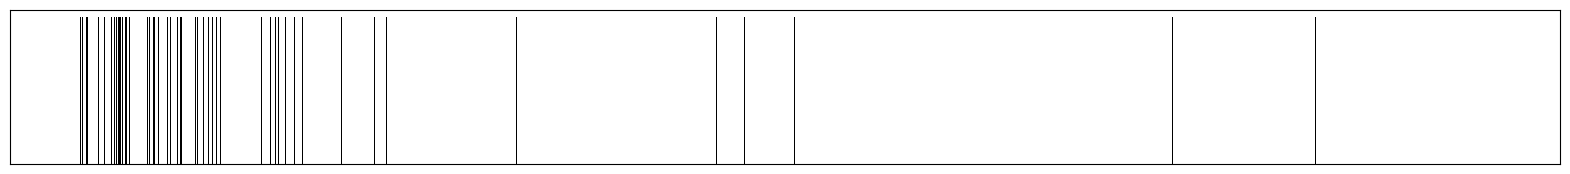

In [74]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Plot the boolean series as a barcode
fig, ax = plt.subplots(figsize=(20, 2))  # Adjust the size as needed

# Plot the boolean series using a bar plot
ax.bar(range(len(data)), data.astype(int), width=1, color=data.map({True: 'black', False: 'white'}))

# Remove axis labels and ticks to make it look like a barcode
ax.set_yticks([])
ax.set_xticks([])

# Set the aspect ratio to be equal so the bars are square-like
ax.set_aspect('auto')

# Show the plot
plt.show()

In [75]:
heb_only = df[df['tkn'].apply(is_hebrew)].reset_index(drop=True)
heb_only['found'] = heb_only["predicted_layers"].apply(lambda x: len(x) != 0)

data = heb_only['found']

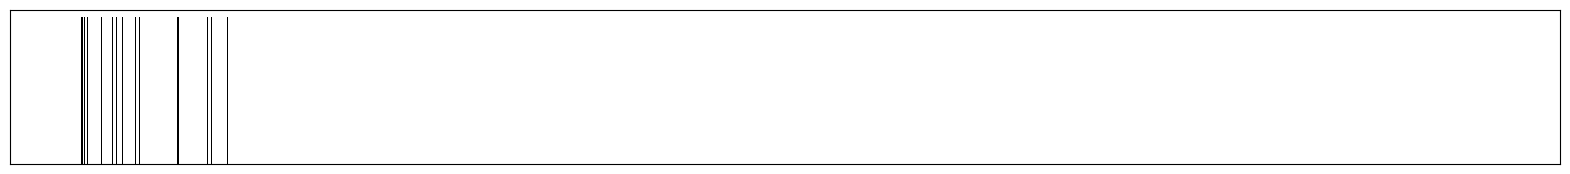

In [76]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Plot the boolean series as a barcode
fig, ax = plt.subplots(figsize=(20, 2))  # Adjust the size as needed

# Plot the boolean series using a bar plot
ax.bar(range(len(data)), data.astype(int), width=1, color=data.map({True: 'black', False: 'white'}))

# Remove axis labels and ticks to make it look like a barcode
ax.set_yticks([])
ax.set_xticks([])

# Set the aspect ratio to be equal so the bars are square-like
ax.set_aspect('auto')

# Show the plot
plt.show()

In [77]:
heb_only.sort_values('unique_but_start_dict_rank')

,vocab_pos,less_frequent_rank,tkn,cnt,unique_but_start_dict_rank,original_tkn,predicted_layers,predicted_values,found
17978,1125,6564,וכלוס,1497,2622,×ķ×Ľ×ľ×ķ×¡,[],"[ו\nThe first is the, 1) 2), 1) 2), 1) 2), 1:1...",False
14281,644,11371,יברס,1980,2624,×Ļ×ĳ×¨×¡,[],"[2) 3), 2) 3), 2) 3), 2) 3), 2) 3), 1\nPreviou...",False
13974,647,11774,וניברס,2031,2678,×ķ×ł×Ļ×ĳ×¨×¡,[],"[1\nThe first one is, 2) 2), 1:1\nPrevious is,...",False
13753,715,12063,יתוב,2067,2782,×Ļ×ª×ķ×ĳ,[],"[1\nThe first one is, 2) 2), 1) 2), 1:1 3), 1:...",False
12494,662,13716,וניברסיט,2316,2978,×ķ×ł×Ļ×ĳ×¨×¡×Ļ×ĺ,[],"[1\nThe first one is, 2) 2), 1:1\nPrevious is,...",False
...,...,...,...,...,...,...,...,...,...
4,84,29501,ש,836079,836163,×©,[],"[2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, ...",False
3,215,29502,הוא,844176,844391,Ġ×Ķ×ķ×Ĳ,[12],"[2), 2), 2), 2), 2), 2), ialah., 1., 3), וְ, 2...",True
2,155,29509,על,1439640,1439795,Ġ×¢×ľ,[],"[2), 3), 3), 3), 2), 2), 2), 1:1, 1:1, 1:1, 3)...",False
1,146,29510,את,1687023,1687169,Ġ×Ĳ×ª,[],"[ת, 2), 2), 1:, ו�, 1:, 1:, 1:, 1:, 1:, 1:, 1:...",False


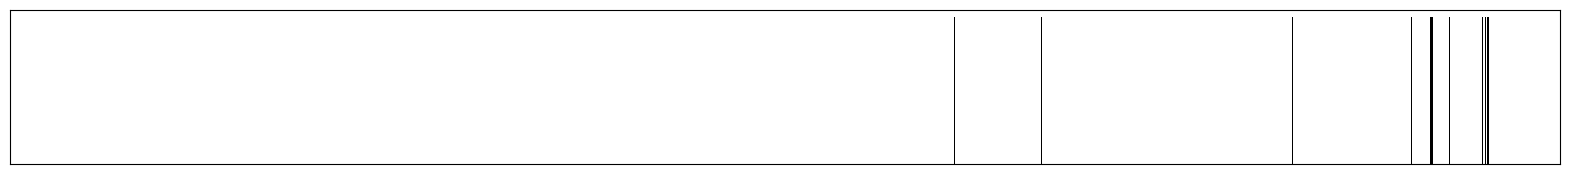

In [78]:
data = heb_only.sort_values('unique_but_start_dict_rank')['found']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Plot the boolean series as a barcode
fig, ax = plt.subplots(figsize=(20, 2))  # Adjust the size as needed

# Plot the boolean series using a bar plot
ax.bar(range(len(data)), data.astype(int), width=1, color=data.map({True: 'black', False: 'white'}))

# Remove axis labels and ticks to make it look like a barcode
ax.set_yticks([])
ax.set_xticks([])

# Set the aspect ratio to be equal so the bars are square-like
ax.set_aspect('auto')

# Show the plot
plt.show()